<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 단축 경로1: 'https://bit.ly/PopH01File'
- 단축 경로2: 'https://bit.ly/PopH02File'
- 단축 경로3: 'https://bit.ly/PopH03File'

In [45]:
# pop01 데이터 읽어오기
path1 = 'https://bit.ly/PopH01File'
pop01 = pd.read_csv(path1)

# 확인
print(pop01)

    year  k_male  k_female
0   1981    4160      4191
1   1982    4160      4191
2   1983    4160      4191
3   1984    4160      4191
4   1985    4160      4191
5   1986    4899      4888
6   1987    5000      4979
7   1988    5156      5120
8   1989    5305      5261
9   1990    5321      5282
10  1991    5468      5405
11  1992    5500      5435
12  1993    5478      5412
13  1994    5409      5351
14  1995    5302      5249
15  1996    5231      5187
16  1997    5187      5150
17  1998    5147      5124
18  1999    5141      5123
19  2000    5167      5145
20  2001    5142      5122
21  2002    5109      5098
22  2003    5085      5089
23  2004    5075      5098
24  2005    5062      5105
25  2006    5062      5119
26  2007    5063      5130
27  2008    5062      5139
28  2009    5059      5149
29  2010    5111      5201
30  2011    5074      5176
31  2012    5041      5154
32  2013    5008      5136
33  2014    4980      5123
34  2015    4931      5091
35  2016    4877      5054
3

In [46]:
# pop02 데이터 읽어오기
path2 = 'https://bit.ly/PopH02File'
pop02 = pd.read_csv(path2)

# 확인
print(pop02)

    year  f_male  f_female
0   1985       7         6
1   1986       7         5
2   1987       6         5
3   1988       5         5
4   1989       6         5
5   1990       5         4
6   1991      18        14
7   1992      19        16
8   1993      19        17
9   1994      21        19
10  1995      24        21
11  1996      27        25
12  1997      28        25
13  1998      27        24
14  1999      30        28
15  2000      32        30
16  2001      34        34
17  2002      36        37
18  2003      49        54
19  2004      54        61
20  2005      61        68
21  2006      83        92
22  2007     111       118
23  2008     123       132
24  2009     122       134
25  2010     125       137
26  2011     135       145
27  2012     118       129
28  2013     118       126
29  2014     129       137
30  2015     133       142
31  2016     131       143
32  2017     128       140
33  2018     137       147
34  2019     134       148
35  2020     115       128


In [47]:
# pop03 데이터 읽어오기
path3 = 'https://bit.ly/PopH03File'
pop03 = pd.read_csv(path3)

# 확인
print(pop03)

    year  household  older_65
0   1981       1915       246
1   1982       2001       260
2   1983       2116       260
3   1984       2246       275
4   1985       2338       211
5   1986       2428       305
6   1987       2518       329
7   1988       2658       349
8   1989       2817       363
9   1990       2820       363
10  1991       3330       424
11  1992       3383       434
12  1993       3431       445
13  1994       3456       454
14  1995       3448       460
15  1996       3457       469
16  1997       3499       485
17  1998       3459       505
18  1999       3491       530
19  2000       3540       560
20  2001       3570       586
21  2002       3624       613
22  2003       3715       650
23  2004       3780       693
24  2005       3871       736
25  2006       3979       787
26  2007       4046       852
27  2008       4098       899
28  2009       4117       943
29  2010       4224      1008
30  2011       4193      1049
31  2012       4178      1111
32  2013  

## 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [14]:
# 데이터 크기 확인
print(pop01.shape)
print('-'*30)
print(pop02.shape)
print('-'*30)
print(pop03.shape)

(40, 3)
------------------------------
(36, 3)
------------------------------
(40, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값 크기를 비교해 차이가 있는 지 각각 확인합니다.

In [19]:
# year 최댓값, 최솟값 확인
print('year 최댓값:', pop01['year'].min(),',year 최솟값:', pop01['year'].max())
print('year 최댓값:', pop02['year'].min(),',year 최솟값:', pop02['year'].max())
print('year 최댓값:', pop03['year'].min(),',year 최솟값:', pop03['year'].max())

year 최댓값: 1981 ,year 최솟값: 2020
year 최댓값: 1985 ,year 최솟값: 2020
year 최댓값: 1981 ,year 최솟값: 2020


**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [22]:
# 결측치 확인
print(pop01.info())
print('-'*30)
print(pop02.info())
print('-'*30)
print(pop03.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      40 non-null     int64
 1   k_male    40 non-null     int64
 2   k_female  40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      36 non-null     int64
 1   f_male    36 non-null     int64
 2   f_female  36 non-null     int64
dtypes: int64(3)
memory usage: 992.0 bytes
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       40 non-null     int64
 1   household  40 non-null     int64
 2   older_65   40 

4) 상/하위 데이터 확인
- 세 개의 데이터프레임에 상/하위 데이터를 파악합니다.

In [23]:
print(pop01.head())
print(pop01.tail())
print('-'*30)
print(pop02.head())
print(pop02.tail())
print('-'*30)
print(pop03.head())
print(pop03.tail())

   year  k_male  k_female
0  1981    4160      4191
1  1982    4160      4191
2  1983    4160      4191
3  1984    4160      4191
4  1985    4160      4191
    year  k_male  k_female
35  2016    4877      5054
36  2017    4830      5027
37  2018    4774      4992
38  2019    4744      4985
39  2020    4702      4967
------------------------------
   year  f_male  f_female
0  1985       7         6
1  1986       7         5
2  1987       6         5
3  1988       5         5
4  1989       6         5
    year  f_male  f_female
31  2016     131       143
32  2017     128       140
33  2018     137       147
34  2019     134       148
35  2020     115       128
------------------------------
   year  household  older_65
0  1981       1915       246
1  1982       2001       260
2  1983       2116       260
3  1984       2246       275
4  1985       2338       211
    year  household  older_65
35  2016       4190      1301
36  2017       4220      1365
37  2018       4264      1416
38  2019

5) 기초 통계정보 확인
- 세 개의 데이터프레임의 기초 통계정보를 각각 확인합니다.

In [25]:
print(pop01.describe())
print('-'*30)
print(pop02.describe())
print('-'*30)
print(pop03.describe())

              year       k_male     k_female
count    40.000000    40.000000    40.000000
mean   2000.500000  4982.550000  5025.525000
std      11.690452   365.083408   339.917485
min    1981.000000  4160.000000  4191.000000
25%    1990.750000  4893.500000  5018.250000
50%    2000.500000  5062.500000  5122.500000
75%    2010.250000  5158.750000  5159.500000
max    2020.000000  5500.000000  5435.000000
------------------------------
              year      f_male    f_female
count    36.000000   36.000000   36.000000
mean   2002.500000   65.472222   69.472222
std      10.535654   51.371747   57.121168
min    1985.000000    5.000000    4.000000
25%    1993.750000   20.500000   18.500000
50%    2002.500000   42.500000   45.500000
75%    2011.250000  122.250000  132.500000
max    2020.000000  137.000000  148.000000
------------------------------
              year    household     older_65
count    40.000000    40.000000    40.000000
mean   2000.500000  3493.300000   711.150000
std      11

6) 범주형 데이터 확인
- 세 개의 데이터프레임에 범주형 데이터가 있는지 각각 확인합니다.

In [33]:
print(pop01['year'].unique()) 
print(pop01['k_male'].unique()) 
print(pop01['k_female'].unique()) 

print(pop02['year'].unique()) 
print(pop02['f_male'].unique()) 
print(pop02['f_female'].unique()) 

print(pop03['year'].unique()) 
print(pop03['household'].unique()) 
print(pop03['older_65'].unique()) 

[1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[4160 4899 5000 5156 5305 5321 5468 5500 5478 5409 5302 5231 5187 5147
 5141 5167 5142 5109 5085 5075 5062 5063 5059 5111 5074 5041 5008 4980
 4931 4877 4830 4774 4744 4702]
[4191 4888 4979 5120 5261 5282 5405 5435 5412 5351 5249 5187 5150 5124
 5123 5145 5122 5098 5089 5105 5119 5130 5139 5149 5201 5176 5154 5136
 5091 5054 5027 4992 4985 4967]
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020]
[  7   6   5  18  19  21  24  27  28  30  32  34  36  49  54  61  83 111
 123 122 125 135 118 129 133 131 128 137 134 115]
[  6   5   4  14  16  17  19  21  25  24  28  30  34  37  54  61  68  92
 118 132 134 137 145 129 126 142 143 140 147 148 128]
[1981 1982 198

## 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat을 사용해 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- **year** 열을 기준으로 **outer** 방식으로 조인(병합)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [113]:
# 데이터프레임 조인
# pop01 = pd.read_csv(path1, index_col = 'year')
# pop02 = pd.read_csv(path2, index_col = 'year')
# pop03 = pd.read_csv(path3, index_col = 'year')
pop = pd.merge(pop01, pop02, on='year', how='outer')
pop = pd.merge(pop, pop03, on='year', how='outer')
# 확인
print(pop)

    year  k_male  k_female  f_male  f_female  household  older_65
0   1981    4160      4191     NaN       NaN       1915       246
1   1982    4160      4191     NaN       NaN       2001       260
2   1983    4160      4191     NaN       NaN       2116       260
3   1984    4160      4191     NaN       NaN       2246       275
4   1985    4160      4191     7.0       6.0       2338       211
5   1986    4899      4888     7.0       5.0       2428       305
6   1987    5000      4979     6.0       5.0       2518       329
7   1988    5156      5120     5.0       5.0       2658       349
8   1989    5305      5261     6.0       5.0       2817       363
9   1990    5321      5282     5.0       4.0       2820       363
10  1991    5468      5405    18.0      14.0       3330       424
11  1992    5500      5435    19.0      16.0       3383       434
12  1993    5478      5412    19.0      17.0       3431       445
13  1994    5409      5351    21.0      19.0       3456       454
14  1995  

**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [114]:
# 결측치 확인
print(pop.isnull().sum())

year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64


**3) 결측치 저리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [115]:
# 결측치 제거
pop.dropna(axis=0, inplace=True)
           
# 확인
print(pop.isnull().sum())
print(pop.head())

year         0
k_male       0
k_female     0
f_male       0
f_female     0
household    0
older_65     0
dtype: int64
   year  k_male  k_female  f_male  f_female  household  older_65
4  1985    4160      4191     7.0       6.0       2338       211
5  1986    4899      4888     7.0       5.0       2428       305
6  1987    5000      4979     6.0       5.0       2518       329
7  1988    5156      5120     5.0       5.0       2658       349
8  1989    5305      5261     6.0       5.0       2817       363


**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [124]:
# 열 추가
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop['f_female']
pop['total'] = pop['k_total'] + pop['f_total']

#  확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363


**4) (옵션) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
- year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65


In [107]:
print(pop.columns)

Index(['year', 'household', 'total', 'male', 'female', 'k_total', 'k_male',
       'k_female', 'f_total', 'f_male', 'f_female', 'older_65'],
      dtype='object')


In [125]:
# 열 순서 변경
pop = pop[['year', 'household', 'total', 'male', 'female', 'k_total', 
           'k_male', 'k_female', 'f_total', 'f_male', 'f_female', 'older_65']]

# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363


**5) (옵션) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 변호를 갖지 않는다면 인덱스를 초기화합니다.

In [126]:
# 인덱스 초기화
pop.reset_index(drop=True, inplace=True)

# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363


## 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화를 선 그래프로 시각화해 확인합니다.

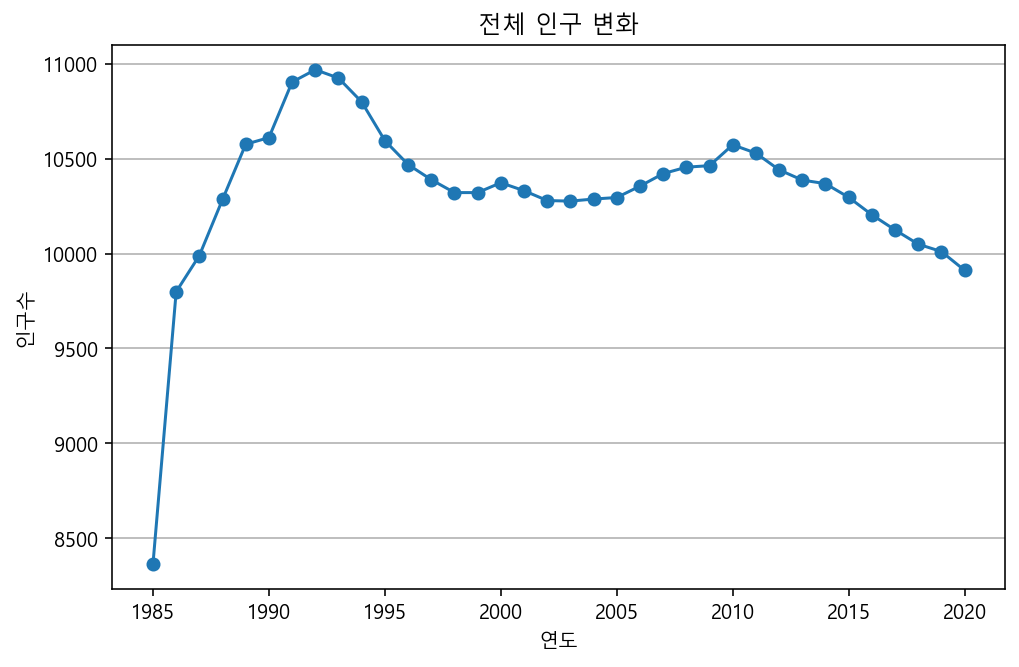

In [153]:
# 전체 인구 변화
plt.figure(figsize=(8,5))
plt.plot(pop['year'],pop['total'], marker='o')
plt.title('전체 인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.grid(axis='y')
plt.show()

**2) 남녀 인구 변화**

- 전체 남녀 인구 변화를 선 그래프로 시각화해 확인합니다.


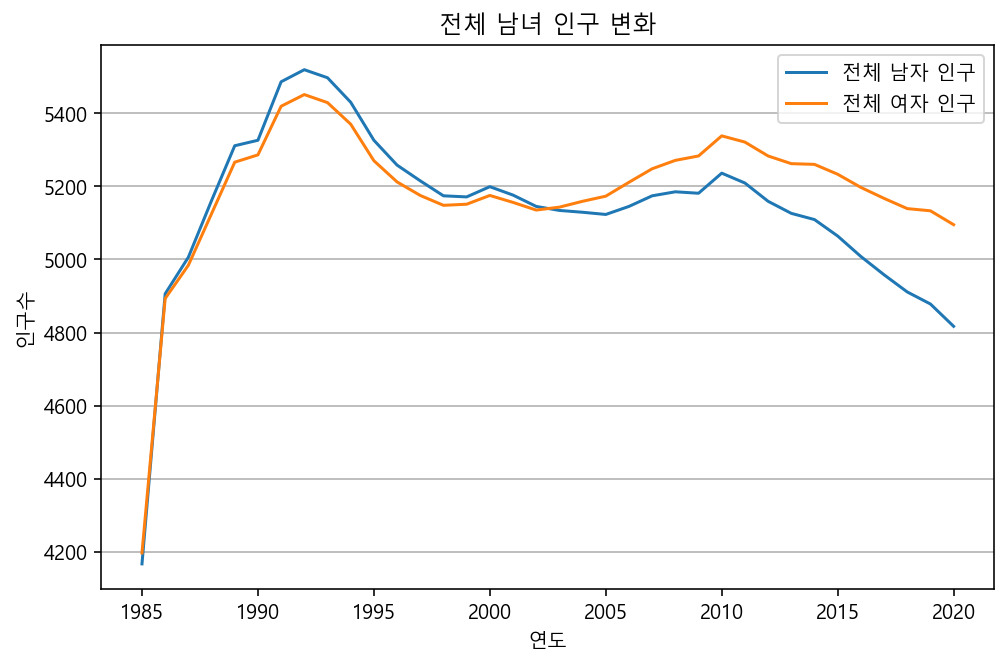

In [147]:
# 남녀 인구 변화
plt.figure(figsize=(8,5))
plt.plot(pop['year'],pop['male'])
plt.plot(pop['year'],pop['female'])
plt.legend(['전체 남자 인구', '전체 여자 인구'])
plt.title('전체 남녀 인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.grid(axis='y')
plt.show()

**3) 한국인 인구 변화**

- 한국인 인구 변화를 선 그래프로 시각화해 확인합니다.

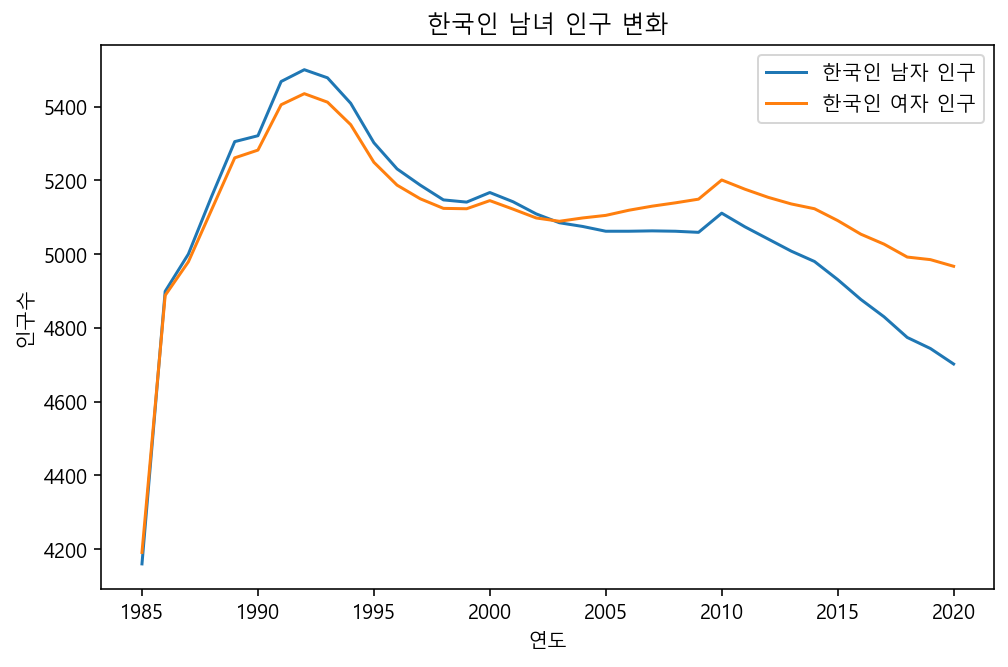

In [142]:
# 한국인 남녀 인구 변화
plt.figure(figsize=(8,5))
plt.plot(pop['year'],pop['k_male'])
plt.plot(pop['year'],pop['k_female'])
plt.legend(['한국인 남자 인구', '한국인 여자 인구'])
plt.title('한국인 남녀 인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.show()

**4) (옵션) 외국인 인구 변화**

- 외국인 인구 변화를 선 그래프로 시각화해 확인합니다.

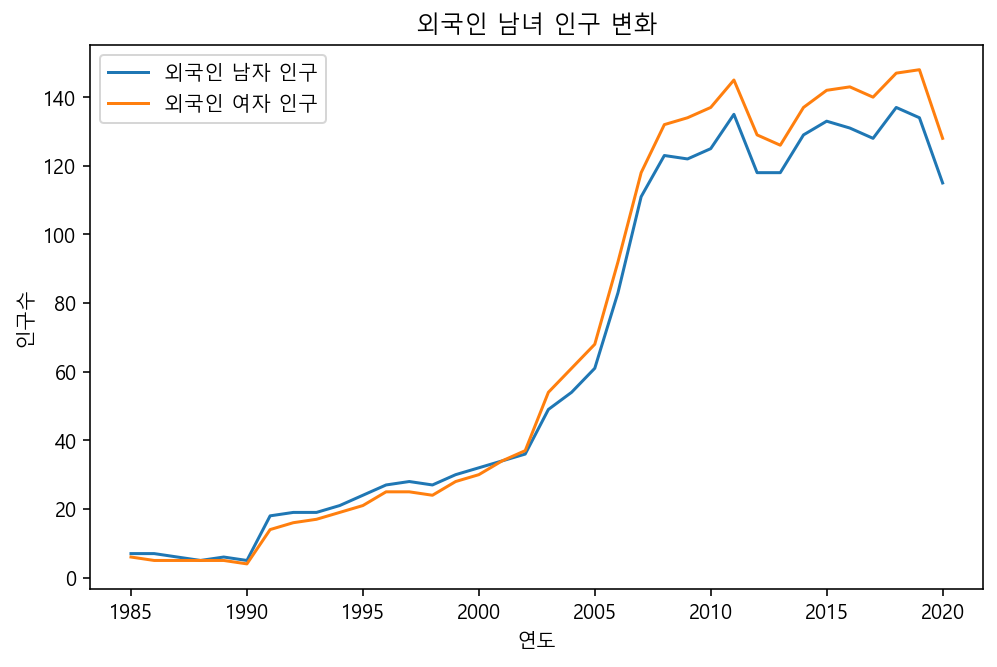

In [144]:
# 외국인 남녀 인구 변화
plt.figure(figsize=(8,5))
plt.plot(pop['year'],pop['f_male'])
plt.plot(pop['year'],pop['f_female'])
plt.legend(['외국인 남자 인구', '외국인 여자 인구'])
plt.title('외국인 남녀 인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.show()

**5) (옵션) 가구수 변화**

- 가구수 변화를 선 그래프로 시각화해 확인합니다.

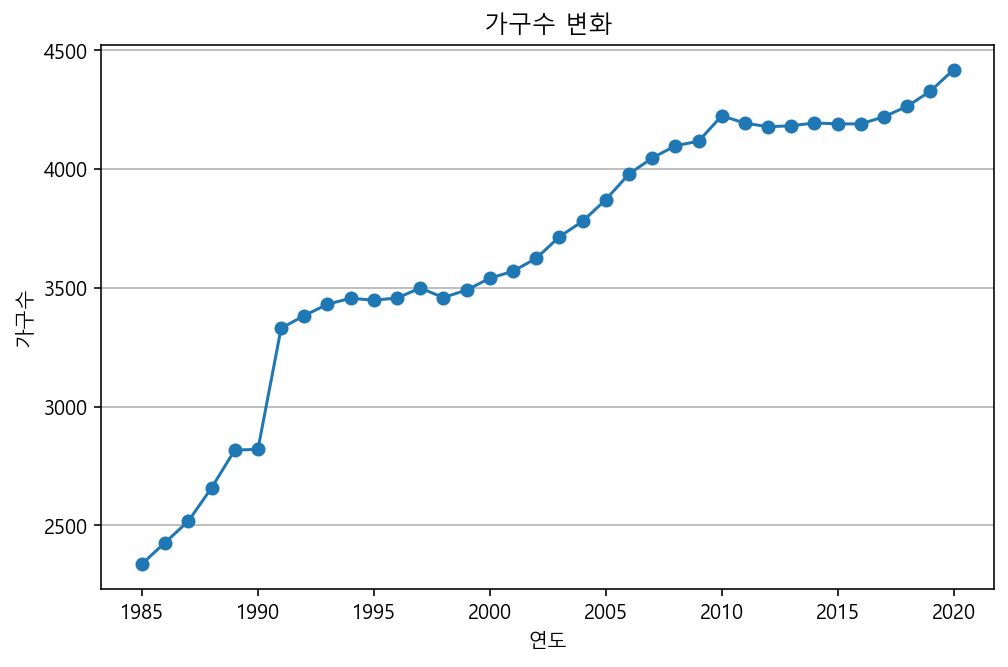

In [151]:
# 가구수 변화
plt.figure(figsize=(8,5))
plt.plot(pop['year'],pop['household'], marker='o')
plt.title('가구수 변화')
plt.xlabel('연도')
plt.ylabel('가구수')
plt.grid(axis='y')
plt.show()

**6) (옵션) 노령인구 변화**

- 노령인구 변화를 선 그래프로 시각화해 확인합니다.

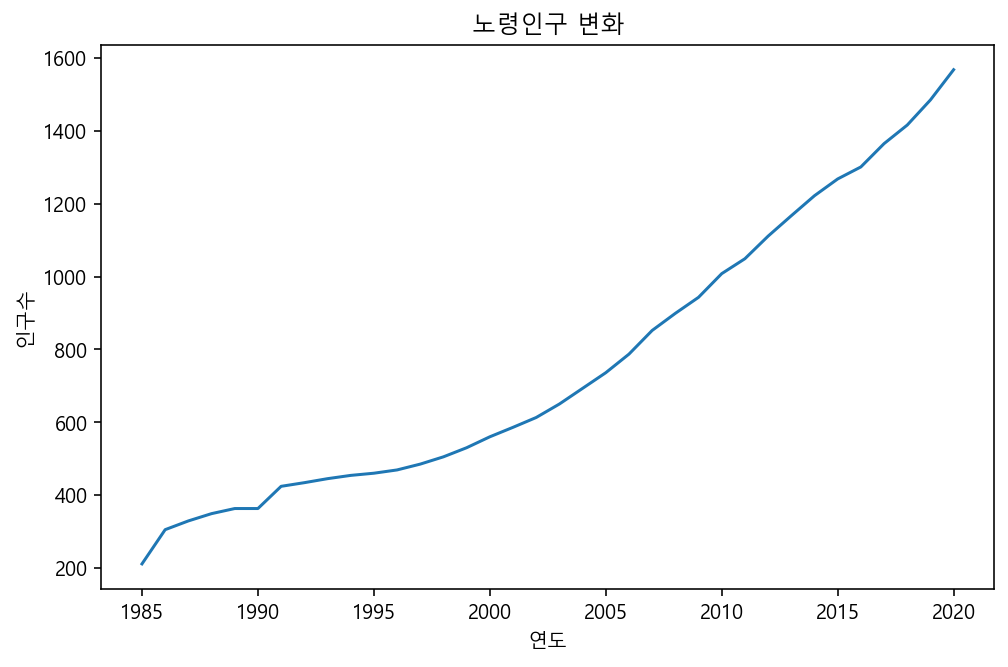

In [146]:
# 65세 이상 변화
plt.figure(figsize=(8,5))
plt.plot(pop['year'],pop['older_65'])
plt.title('노령인구 변화')
plt.xlabel('연도')
plt.ylabel('인구수')
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 서울시의 전체인구가 1990년 초까지 최고점에 이르렀다가 지속적으로 감소하는 경향을 보인다.
- 서울시의 여자 인구가 2000년 초를 기점으로 남자 인구보다 지속적으로 증가하는 것으로 보인다. 특히 2010년을 기준으로 남자의 인구가 급격히 줄면서 그 차이는 크게 벌어진다.
- 서울시의 전체 남녀 인구 변화와 서울시의 한국인 남녀 인구 변화는 거의 비슷한 동향을 보인다. 이것은 전체 인구비율에서 한국인이 많은 비율을 차지하는 것을 알 수 있다.
- 2005년 기준으로 외국인 인구가 크게 급증하였다.
- 노령 인구가 꾸준히 증가하는 경향을 보이므로 미래에는 더 많은 노령 인구가 있을 것으로 예상된다.
- 서울시의 전체 인구수가 급변하는 시기에 인근 지역의 인구수와 비교해본다.
- 1990년, 2000년 초 어떤 사회변화가 있는지 탐구해본다.
- 노령인구에 대한 사회적 인식이 더 좋아지고 사회 시설이 확대되었으면 좋겠습니다.

**2) 기타**

- 데이터를 불러오는데 시간이 많이 걸려서 우왕좌왕했습니다ㅎ.. 연습을 많이 해봐야겠다고 생각했습니다!